In [3]:
import pandas as pd

'''I am using a JSON file for my dataset because my application analyzes texts and the "text" variable in a JSON file, unlike the cell for "text" in a
csv file, doesn't have any limit on how much text it can contain which means that it's appropriate for long stories as well as whole novels'''

'''I am using pandas to read the JSON file because it has a built-in support for reading JSON files, it provides various options for parsing JSON data
and it is efficient for handling large JSON datasets because it uses underlying libraries like NumPy for fast data manipulation and supports operations
like filtering, grouping, and aggregation, which are common tasks when working with data'''

# Read the JSON file into a DataFrame
stories = pd.read_json('dataset.json')

'''After converting my old csv file into a JSON file, some rows with no values appear at the bottom after reading the file. These rows trigger errors
when I later try to use the data. For that reason, I clean the data by removing all rows with no values.'''

# Remove rows with missing values
stories.fillna(value="", inplace=True)

In [4]:
# Display 10 random stories from the DataFrame
stories.sample(n=10)

,text,genre,title
1212,"In the merry kingdom of Chuckleburg, where lau...",Comedy,The Whimsical Misadventures of Sir Chuckleswor...
998,"In the distant future, humanity had evolved in...",Science fiction,Aeon's Awakening: Rise of the Hypercivilization
410,"In the opulent world of high society, Detectiv...",Crime,The Case of the Vanishing Heiress
309,Amidst the rugged cliffs and crashing waves of...,Romance,Echoes of the Lighthouse
1395,"In the tranquil town of Willowbrook, nestled a...",Romance,Infinite Serenade
421,"In the picturesque town of Crimson Harbor, nes...",Crime,Crimson Echoes
1008,"In the distant future, humanity had reached th...",Science fiction,Elysian Ascension: The Cosmic Nexus
27,"In a picturesque coastal town, where the scent...",Romance,Moonlit Serenade
1469,"In the sleepy town of Chuckleford, where the s...",Comedy,The Hapless Hero of Hilarity
1326,"In the whimsical town of Jesterville, where ev...",Comedy,The Chuckle Challenge


In [5]:
# Display the first 10 stories of the DataFrame
stories.head(10)

,text,genre,title
0,In the heart of the bustling city of Harmony F...,Crime,"The Sinister Symphony: A Tale of Crime, Betray..."
1,"In the sprawling metropolis of Shadowvale, whe...",Crime,Echoes of Deceit: Unraveling the Truth in the ...
2,Detective Jacob Hayes was once regarded as one...,Crime,Shadows of Redemption: The Fall and Rise of De...
3,Whispering Pines was a picturesque town nestle...,Crime,Shattered Silence: Unraveling the Mystery of W...
4,In the heart of the bustling metropolis of Obs...,Crime,Shadows of Obsidian: A Tale of Crime and Redem...
5,"In the sprawling city of San Francisco, Detect...",Crime,The Convergence
6,"In the heart of a bustling metropolis, where t...",Crime,Shadows of the City
7,In the sprawling urban landscape of New York C...,Crime,The Last Gambit
8,In the sprawling urban landscape of New York C...,Crime,The Last Gambit
9,"In the heart of a sprawling metropolis, where ...",Crime,City of Shadows


In [6]:
# Display the last 10 stories of the DataFrame
stories.tail(10)

,text,genre,title
1511,The smog-choked streets of New London pulsed w...,Crime,The Clockwork Countess: A Steampunk Murder
1512,The flickering neon lights of Tokyo's bustling...,Crime,The Vanishing Violinist: A Case of Hidden Melo...
1513,The biting Parisian wind whipped Detective Ins...,Crime,The Painted Raven: A Brushstroke of Deception
1514,The opulent ballroom of the Grand Palazzo shim...,Crime,The Painted Raven: A Murder at the Masquerade
1515,The rain hammered against Detective Alistair D...,Crime,The Cybernetic Cipher: A Case of Augmented Min...
1516,The sterile white walls of the CERN laboratory...,Crime,The Quantum Thief: A Disappearance Act Defying...
1517,The crisp mountain air of Switzerland stung In...,Crime,The Quantum Caper: A Heist Most Strange
1518,The acrid smell of burnt coal and engine greas...,Crime,The Airship Assassin: A Case of Steampunk Skie...
1519,The neon lights of Kowloon bled into the humid...,Crime,The Jade Dragon's Curse: A High-Stakes Game in...
1520,The cobblestone streets of Paris glistened und...,Crime,The Crimson Manuscript: A Parisian Puzzle in Ink


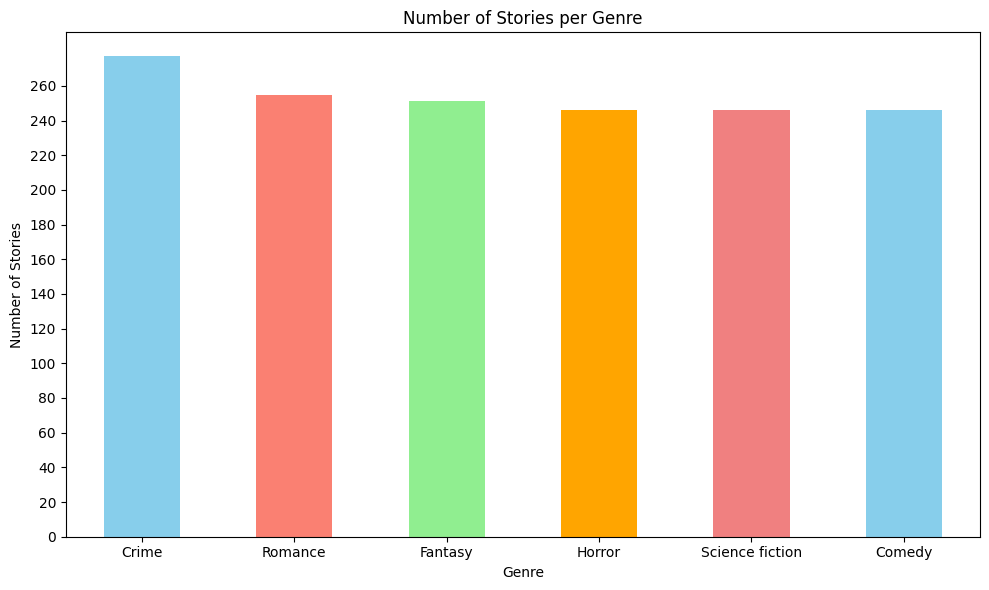

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of stories per genre
genre_counts = stories['genre'].value_counts()

# Define colors for each genre
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Create a bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color=colors)
plt.title('Number of Stories per Genre')  # Title of the plot
plt.xlabel('Genre')  # Label for the x-axis
plt.ylabel('Number of Stories')  # Label for the y-axis
plt.xticks(rotation=0) # Rotate x-axis labels

# storing the max genre counts beforehand to avoid unnecessary calculations
genre_counts_max = genre_counts.max()

# Set y-axis ticks with interval of 20
plt.yticks(np.arange(0, genre_counts_max+1, 20))

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

'''In text classification, there are certain words which are redundant to be included in the analysis and can only confuse the model. The same goes for
punctuation. For that reason, there is a list of stopwords from the sklearn library which includes words like "a", "the" and many others that don't help in 
any way in the classification of the text. I remove all of these words from the texts before I train my model on them.'''

def clean_text(text):
    # Combine steps for efficiency (lowercaseremove punctuation and stopwords and tokenize the text together)
    tokens = [word.lower() for word in re.findall(r'\b\w+\b', text.lower()) if word not in ENGLISH_STOP_WORDS]
    
    # Join the tokens back into text
    text_cleaned = ' '.join(tokens)
    
    return text_cleaned

In [26]:
# Combine title and text with an efficient vectorized approach
stories['combined_text'] = stories[['title', 'text']].apply(lambda x: ' '.join(x), axis=1)

# Extracting features (X) and target variable (y)
X = stories['combined_text'].apply(clean_text)
y = stories['genre']

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

'''I decided that, when splitting the data, the test data size should be 20% while the train data should be 80% because I found out this is the norm.'''

'''I use the 'random_state' variable to get the same split of the data each time I rerun the code.'''

'''I stratify the sets to ensure that a similar percentage of stories from each genre is included in each set.'''

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)

'''I use Logistic Regression classifier because it is appropriate for text classification and it gives the highest accuracy value out of any classifier
which is 0.99.''

'''I decided to use a pipeline which includes both the TF-IDF vectorizer and Logistic Regression classifier because otherwise I would have to
write separate code to vectorize the texts before feeding them to the model. Meanwhile, when I use the pipeline and include a TF-IDF vectorizer in
it, the texts which are fed to the model are automatically vectorized.'''

# Creating a pipeline with TF-IDF vectorizer and Logistic Regression classifier
model = make_pipeline(
  TfidfVectorizer(),
  LogisticRegression(max_iter=1000)
)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating and printing the accuracy
score = accuracy_score(y_test, predictions)
print("Accuracy:", round(score, 2))

# Printing the classification report to give more information
print(classification_report(y_test, predictions))

Accuracy: 0.99
                 precision    recall  f1-score   support

         Comedy       0.98      1.00      0.99        49
          Crime       1.00      0.95      0.97        56
        Fantasy       1.00      1.00      1.00        51
         Horror       0.94      1.00      0.97        49
        Romance       1.00      1.00      1.00        51
Science fiction       1.00      0.98      0.99        49

       accuracy                           0.99       305
      macro avg       0.99      0.99      0.99       305
   weighted avg       0.99      0.99      0.99       305



Confusion matrix
[[49  0  0  0  0  0]
 [ 0 53  0  3  0  0]
 [ 0  0 51  0  0  0]
 [ 0  0  0 49  0  0]
 [ 0  0  0  0 51  0]
 [ 1  0  0  0  0 48]]


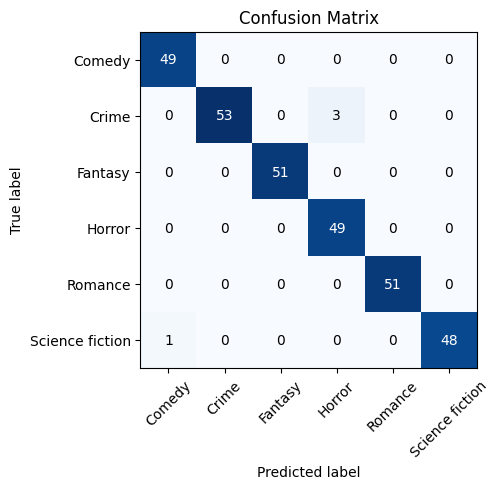

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the unique genre labels
genre_labels = model.named_steps['logisticregression'].classes_

# Get the confusion matrix
y_true = y_test
y_pred = predictions
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix (optional)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define labels for the confusion matrix
class_names = genre_labels

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied to show the proportion of each incorrectly classified sample.
    """
    
    if normalize:
        cm = cm_normalized
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix")
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        fmt = '.2f'
    else:
        fmt = 'd'
    thresh = cm.max() / 2.
    for i in tick_marks:
        for j in tick_marks:
            plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')

In [34]:
import numpy as np

# Title to be classified and clean the title
title = clean_text('''Unromancing the stone''')

# One-vs-Rest (OvR) approach for multi-class Logistic Regression
# This assumes your Logistic Regression model is trained using OvR

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder to transform genre labels into binary vectors
# encoder = OneHotEncoder(sparse=False)
encoder = OneHotEncoder()

# Get the unique genre labels
genre_labels = model.named_steps['logisticregression'].classes_

# Transform genre labels into a binary matrix
encoded_genres = encoder.fit_transform(genre_labels.reshape(-1, 1))

# Make a prediction for the encoded genre (assuming OvR)
predicted_genre_index = model.predict([title])[0]

# Get the probability estimates for each genre (using decision function)
genre_probabilities = model.decision_function([title])[0]

genre_probabilities_for_titles = []

print("For titles")
print("")

# Print genre and estimated probability for each class
for i, genre in enumerate(genre_labels):
  probability = 1 / (1 + np.exp(-genre_probabilities[i]))  # Sigmoid function
  genre_probabilities_for_titles.append({'genre': genre, 'probability': probability})
  print(f"Genre: {genre}, Probability: {probability:.2f}")

# Text to be classified and clean the text
text = clean_text('''Every story is true and a lie. My mother tells a story about the love of her life. It’s a simple one, but she always cries when she tells it and looks right through me, as though I hadn’t been born. Something about the detail makes me feel there’s a sadness in the world that will last until the rushing crack of doom.

It goes like this: In the forties, when she was a teenaged girl in Tennessee, my mother fell in love with the boy next door. That same year the government decided to build dams all over the state. As if some crazy rainstorm had come and gone, pristine new lakes puddled the landscape from Knoxville to Memphis. One lake formed right over my mother’s hometown—people lost their homes, lost their businesses, their graveyards, their farmland and, in some cases, their hearts. On the night before the government moved everybody out of her hometown my mother and the love of her life, this boy next door, made love in my mother’s bedroom. Her parents were at a prayer meeting, praying for dry land, I guess, like Noah. This boy was sweet, was kind, was smart and generous and lovely to look at; this boy was the love of her life. He moved with his family to Texas the next day and she never saw him again.

Except: Once a year she rents a rowboat and goes out on the lake that has drowned her old hometown. She drops a penny over the side, right over the place where her old house must be. Fifty years, fifty pennies. She imagines them drifting downward, all those pennies, drifting through the murky lake water, startling the catfish and bullhead, each penny listing into the open window of her bedroom and falling at last onto the pillow where she once lay with her head against the love of her life, the boy next door. She imagines their ghost love showered by pennies; she imagines this love beyond all loves glittering with gold. Then she rows back to shore and back to my father and me and the life that can’t compete with memory.

Every story is true and a lie. The true part of this one is, Love and the memory of love can’t be drowned. The lie part is that this is a good thing.''')

# Make a prediction for the encoded genre (assuming OvR)
predicted_genre_index = model.predict([text])[0]

# Get the probability estimates for each genre (using decision function)
genre_probabilities = model.decision_function([text])[0]

genre_probabilities_for_texts = []

print("")
print("For texts")
print("")

# Print genre and estimated probability for each class
for i, genre in enumerate(genre_labels):
  probability = 1 / (1 + np.exp(-genre_probabilities[i]))  # Sigmoid function
  genre_probabilities_for_texts.append({'genre': genre, 'probability': probability})
  print(f"Genre: {genre}, Probability: {probability:.2f}")

# List to store predictions with high probabilities
high_probability_predictions = []

print("")
print("Combined")
print("")

probabilities = []

for i, genre in enumerate(genre_labels):
  probability_title = genre_probabilities_for_titles[i]['probability'] * 0.05
  probability_text = genre_probabilities_for_texts[i]['probability']
  probability = probability_title + probability_text

  if probability >= 0.65:
      high_probability_predictions.append({'genre': genre, 'probability': probability})
  if probability >= 1:
      print(f"Genre: {genre}, Probability: {probability:.2f} => 1.0")
      probabilities.append({'genre': genre, 'probability': probability})
  else:
      print(f"Genre: {genre}, Probability: {probability:.2f}")
      probabilities.append({'genre': genre, 'probability': probability})

# Sorting the high probability predictions list in descending order based on 'probability'
high_probability_predictions = sorted(high_probability_predictions, key=lambda x: x['probability'], reverse=True)

genre_number = 0

print("")

for probability in high_probability_predictions:
    if len(high_probability_predictions) > 1:
        genre_number += 1
        print(f'Genre {genre_number}: {probability['genre']}')
    elif len(high_probability_predictions) > 0:
        print(f'Genre: {probability['genre']}')

if not high_probability_predictions:
    print(f'Genre could not be precisely defined. Closest option is {max(probabilities, key=lambda x: x['probability'])['genre']}')

For titles

Genre: Comedy, Probability: 0.64
Genre: Crime, Probability: 0.51
Genre: Fantasy, Probability: 0.48
Genre: Horror, Probability: 0.51
Genre: Romance, Probability: 0.44
Genre: Science fiction, Probability: 0.41

For texts

Genre: Comedy, Probability: 0.45
Genre: Crime, Probability: 0.38
Genre: Fantasy, Probability: 0.32
Genre: Horror, Probability: 0.55
Genre: Romance, Probability: 0.89
Genre: Science fiction, Probability: 0.29

Combined

Genre: Comedy, Probability: 0.49
Genre: Crime, Probability: 0.41
Genre: Fantasy, Probability: 0.35
Genre: Horror, Probability: 0.58
Genre: Romance, Probability: 0.91
Genre: Science fiction, Probability: 0.31

Genre: Romance
